# Final Report

## Introduction

This project involves the joint analyses on what we determined to be the "best neighborhood" in Pittsburgh. We decided to measure "bestness" by how safe each Pittsburgh neighborhood is. Thus, our best neighborhood is the `safest neighborhood.` Some other alternative metrics we have explored included the environmental quality of neighborhoods and the quality of education of neighborhoods. However, We felt that the metric of "safeness" of neighborhood could recieve the most in-depth analysis.

## The Metric

The metric we chose is safeness, or more specifically, the amount of crime and disturbances. We are measuring the number of incidents per neighborhood and what those incidents are. The databases we used are 311 data, police arrest data, and police incident blotter data.

## The Best Neighborhood

### Data on 311

### 311 data includes a list of calls people from various Pittsburgh neighborhoods have made regarding complaints or requests about their neighborhood.

First, I imported the appropriate `python` packages that I need to perform calculations.

In [2]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

I loaded the dataset I will be using. It is 311 data. I also grabbed the first 10 attributes. 

In [23]:
data_on_311 = pd.read_csv("311-data.csv", index_col= "_id")
data_on_311.head(10)

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
_id,,,,,,,,,,,,,,,,,
70915,161823.0,2017-06-14T10:03:00,Rodent control,Call Center,1,Animal Care & Control,Garfield,9.0,10.0,4.200310e+10,2.0,10.0,5.0,3-4,-79.943235,40.467422,APPROXIMATE
48238,178453.0,2017-08-11T08:03:00,Illegal Parking,Call Center,1,Police - Zones 1-6,Squirrel Hill South,5.0,14.0,4.200314e+10,3.0,14.0,4.0,2-21,-79.916473,40.430555,APPROXIMATE
38897,178457.0,2017-08-11T08:37:00,Potholes,Call Center,1,DPW - Street Maintenance,Beltzhoover,4.0,18.0,4.200356e+10,5.0,18.0,3.0,4-21,-79.998201,40.413781,EXACT
57156,178460.0,2017-08-11T08:45:00,Dead tree (Public property),Call Center,1,DPW - Forestry Division,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,-80.030003,40.415902,EXACT
53592,178463.0,2017-08-11T08:49:00,Weeds/Debris,Call Center,1,"Permits, Licenses and Inspections",Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,-79.990583,40.393540,EXACT
49353,178466.0,2017-08-11T08:59:00,Litter,Call Center,1,DPW - Street Maintenance,Allentown,3.0,18.0,4.200318e+10,5.0,18.0,3.0,4-5,-79.995679,40.424059,EXACT
70925,161573.0,2017-06-13T14:47:00,Tree Fallen Across Road,Call Center,1,DPW - Street Maintenance,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-23,-79.997125,40.399176,EXACT
70927,161594.0,2017-06-13T15:41:00,Tree Fallen Across Road,Call Center,1,DPW - Street Maintenance,South Side Slopes,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,-79.968387,40.424271,EXACT
58038,178467.0,2017-08-11T09:01:00,Dead Animal,Call Center,1,Animal Care & Control,Beltzhoover,3.0,18.0,4.200356e+10,5.0,18.0,3.0,4-21,-80.000102,40.414922,EXACT


I created a variable called 'neighborhoodfrequency' that shows how many times each given neighborhood had a call recorded about them. It shows the frequency of the neighborhoods in order from most appeared to least appeared. 

In [24]:
neighborhoodfrequency = data_on_311["NEIGHBORHOOD"].value_counts()
neighborhoodfrequency

Brookline               22609
Carrick                 21614
Squirrel Hill South     18737
South Side Slopes       18349
South Side Flats        16644
                        ...  
East Carnegie             527
Northview Heights         526
Glen Hazel                369
Arlington Heights         113
Mount Oliver Borough       61
Name: NEIGHBORHOOD, Length: 91, dtype: int64

As you can see, it shows **Mount Oliver Borough** as the least amount of times people called to make a complain about. 

I created a query mask just to prove that Mount Oliver Borough was only mentioned 61 times, the lowest out of this entire dataset. This query mask counts how many times specifically Mount Oliver Borough is mentioned in this dataset.

In [25]:
query_mask = data_on_311['NEIGHBORHOOD'] == "Mount Oliver Borough"
mountoliborough = data_on_311[query_mask]
mountoliborough["REQUEST_TYPE"].count()

61

I turned the neighborhood frequency into a data frame. 

In [26]:
pd.DataFrame(neighborhoodfrequency)

,NEIGHBORHOOD
Brookline,22609
Carrick,21614
Squirrel Hill South,18737
South Side Slopes,18349
South Side Flats,16644
...,...
East Carnegie,527
Northview Heights,526
Glen Hazel,369
Arlington Heights,113


It shows that there are 91 rows, meaning that there are 91 different recordings. 

I plotted the 10 safest neighborhoods to get a visualization of just HOW safe Mount Oliver Borough is compared with the other safe neighborhoods. 

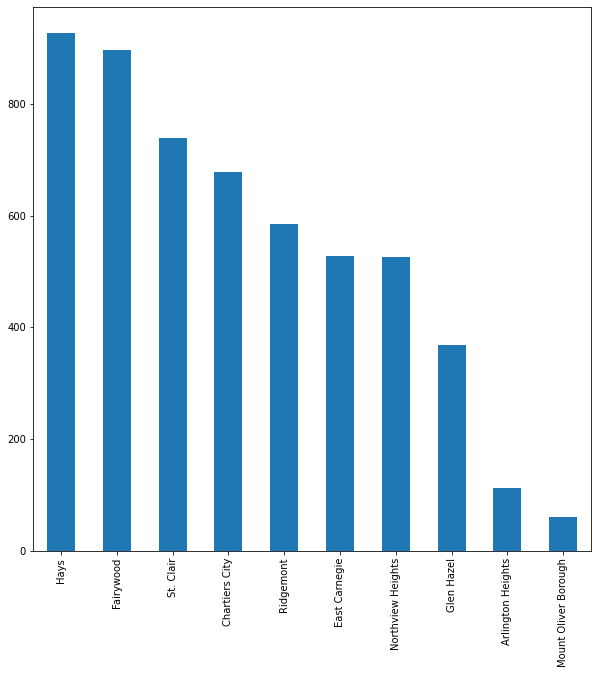

In [27]:
neighborhoodfrequency.tail(10).plot.bar(figsize = (10,10))

You can see how little calls Mount Oliver recieved in comparison to the rest.

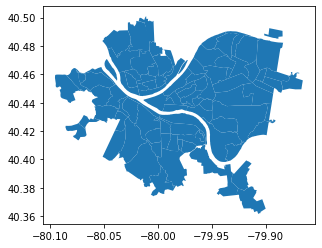

In [28]:
neighborhoods = geopandas.read_file("Neighborhoods_new/neighborhoods_new.shp")
neighborhoods.plot()

I loaded this plain map of Pittsburgh using geopandas.

I started the processs of loading the data on 311 into the plain map of Pittsburgh to show the range of safeness amongst the neighborhoods. I grabbed the first five just to show it was working. 

In [10]:
requests_map = neighborhoods.merge(neighborhoodfrequency, how = 'left', left_on = 'hood', right_on = neighborhoodfrequency.index)
requests_map[['hood', 'NEIGHBORHOOD', 'geometry']].head()

,hood,NEIGHBORHOOD,geometry
0,Mount Oliver Borough,61,"MULTIPOLYGON (((-79.98819 40.41852, -79.98819 ..."
1,Central Oakland,6932,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
2,North Oakland,4891,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
3,West Oakland,2786,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
4,Crawford-Roberts,3525,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."


I adjusted the colors and the key to apply the 311 data to the actual map of Pittsburgh. 

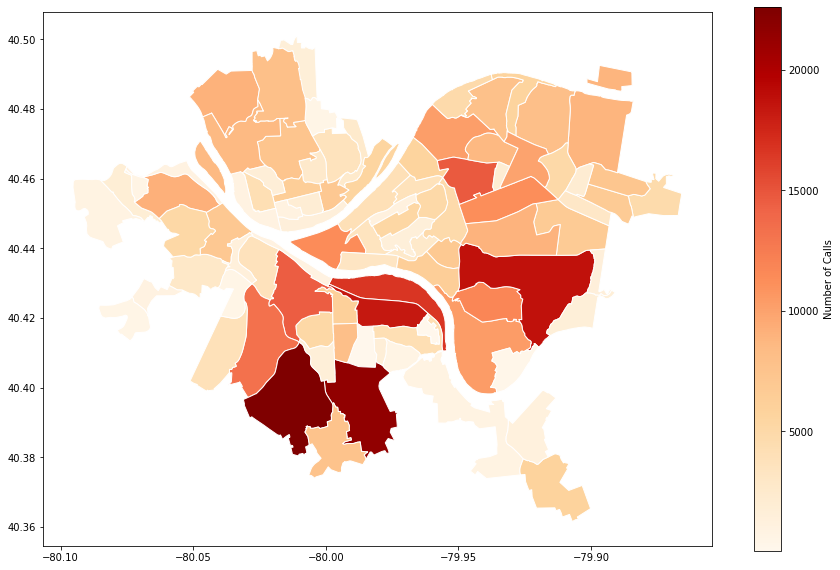

In [11]:
requests_map.plot(column='NEIGHBORHOOD',
                 cmap = 'OrRd',
                 edgecolor = 'white',
                 legend = True,
                 legend_kwds = {'label': 'Number of Calls'},
                 figsize = (15, 10),
                )
                 

As you can see where Mount Oliver is, it clearly has the lowest values compared to the other neighborhoods, thus, making it the safest. 

Now I am going to rate the neighborhoods on a scale from 0-1. 0 is the best because it means that it is the lowest, meaning the least amount of calls and complaints made. 1 is the worst.

In [29]:
ratingfor311 = neighborhoodfrequency/max(neighborhoodfrequency)
ratingfor311

Brookline               1.000000
Carrick                 0.955991
Squirrel Hill South     0.828741
South Side Slopes       0.811579
South Side Flats        0.736167
                          ...   
East Carnegie           0.023309
Northview Heights       0.023265
Glen Hazel              0.016321
Arlington Heights       0.004998
Mount Oliver Borough    0.002698
Name: NEIGHBORHOOD, Length: 91, dtype: float64

Mount Oliver has the best score in my dataset with the lowest score of just 0.002698.

### Arrest Data

In [10]:
# load Pittsburgh arrest data
arrest_data = pd.read_csv('arrest_data.csv')
arrest_data

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51855,2042599,21189479,49.0,M,B,2021-10-15T18:53:00,"Sterrett ST & Felicia WY Pittsburgh, PA 15208",3925 Receiving Stolen Property. / 9501 Bench W...,"900 Block Kennebec ST Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.931832,40.425106
51856,2042600,21189479,38.0,F,W,2021-10-15T18:47:00,"Sterrett ST & Felicia WY Pittsburgh, PA 15208",13(a)(32) Paraphernalia - Use or Possession,"900 Block Kennebec ST Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.931832,40.425106
51857,2042601,21189500,52.0,M,W,2021-10-15T19:37:00,"Bausman ST & Saw Mill Run BL Pittsburgh, PA 15226",1543 Driving While Operating Privilege is Susp...,"Bausman ST & Saw Mill Run BL Pittsburgh, PA 15226",Bon Air,3,1806.0,4.0,5.0,-80.006071,40.411077
51858,2042602,21189596,35.0,F,B,2021-10-15T22:16:00,"E Carson ST & S 12th ST Pittsburgh, PA 15203",5503 Disorderly Conduct. / 5505 Public Drunken...,"E Carson ST & S 12th ST Pittsburgh, PA 15203",South Side Flats,3,1702.0,3.0,3.0,-79.986426,40.428758


In [11]:
# get the blank map of Pittsburgh
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

DriverError: Neighborhoods/Neighborhoods_.shp: No such file or directory

In [12]:
# neighborhood data
value = arrest_data['INCIDENTNEIGHBORHOOD'].value_counts()
values = pd.DataFrame(value)
values

,INCIDENTNEIGHBORHOOD
Central Business District,3173
South Side Flats,2683
Carrick,1847
East Allegheny,1716
Homewood South,1683
...,...
Regent Square,27
Central Northside,23
Mt. Oliver Boro,17
Troy Hill-Herrs Island,6


In [13]:
# merge the neighborhood data with the map
incidents_map = neighborhoods.merge(value, how='left', left_on='hood', right_on=value.index)

NameError: name 'neighborhoods' is not defined

In [14]:
# Map of where arrests occurred
incidents_map.plot(column='INCIDENTNEIGHBORHOOD', 
                  cmap='OrRd',
                  edgecolor="white",
                  legend=True,
                  legend_kwds={'label': "Number of Incidents"},
                  figsize=(15, 10),
                  missing_kwds={"color": "lightgrey"}
                  )


NameError: name 'incidents_map' is not defined

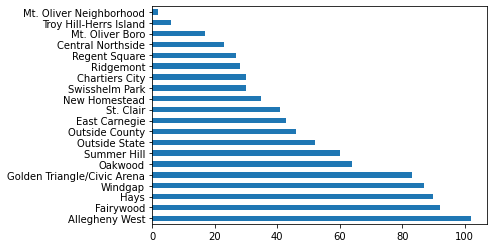

In [15]:
data = arrest_data['INCIDENTNEIGHBORHOOD'].value_counts()
# 20 neighborhoods with the fewest arrests
data.tail(20).plot(kind='barh')


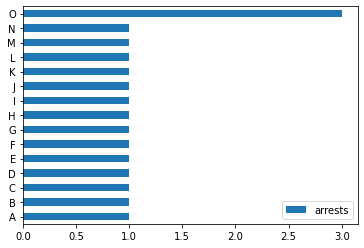

In [16]:
# Reasons for each arrest
plot_data = pd.DataFrame(
            {"arrests": [1,1,1,1,1,1,1,1,1,1,1,1,1,1,3]},
            index=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M","N","O"])
plot_data.plot(kind="barh")


Key for bar graph above
* A: 13(a)(32) Paraphernalia - Use or Possession / 3710 Stopping at Intersection or Crossing to Prevent Obstruction
* B: 5505 Public Drunkenness / 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 5503(a)(4) DISORDERLY CONDUCT - HAZARDOUS/PHYS. OFF
* C: 3925 Receiving Stolen Property. / 1543 Driving While Operating Privilege is Suspended or Revoked. / 3921(a) Theft by Unlawful Taking or Disposition - Movable item
* D: 3925 Receiving Stolen Property.
* E: 5126 Flight to Avoid Apprehension, Trial or Punishment. / 13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 9501 Bench Warrant / 4914(A) False Identification to Law Enforcement                          1
3925 Receiving Stolen Property. 
* F: 13(a)(16) Possession of Controlled Substance / 13(a)(32) Paraphernalia - Use or Possession / 9501 Bench Warrant
* G: 2701 Simple Assault. / 2709 Harassment (Non-Specific)
* H: 13(a)(16) Possession of Controlled Substance
* I: 4101 Forgery. / 4105(a)(1) Bad Checks
* J: 3925 Receiving Stolen Property. / 6106 Firearms not to be Carried without a License. / 1501 Drivers Required to be Licensed. / 3334 Turning Movements and Required Signals. / 13(a)(16) Possession of Controlled Substance / 6110.1 Possession of Firearm by Minor    1
4101 Forgery. / 4105(a)(1) Bad Checks
* K: 2709.1 Stalking Conduct or Repeatedly Acts Including Follows
* L: 13(a)(16) Possession of Controlled Substance / 13(a)(30) Possession w/ Intent to Del. Controlled Substance / 13(a)(30)* Delivery of Controlled Substance
* M: 13(a)(16) Possession of Controlled Substance / 9501 Bench Warrant
* N: 2706 Terroristic Threats. / 2709 Harassment (Non-Specific)  
* O: 903 Criminal Conspiracy. / 2701 Simple Assault.


In [18]:
ratingforarrestdata = value/ max(value)
ratingforarrestdata

Central Business District    1.000000
South Side Flats             0.845572
Carrick                      0.582099
East Allegheny               0.540813
Homewood South               0.530413
                               ...   
Regent Square                0.008509
Central Northside            0.007249
Mt. Oliver Boro              0.005358
Troy Hill-Herrs Island       0.001891
Mt. Oliver Neighborhood      0.000630
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: float64

### Police Incident Data

In [4]:
df = pd.read_csv("police_incident_data.csv")
df = df.dropna()
df.head(5)

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,265584996,21204292,27,2021-11-09T11:33:00,"10 Block S 18th St & Pius St Pittsburgh, PA 15203",N,South Side Slopes,3,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1706.0,3.0,3.0,-79.981049,40.425811
1,265586753,21204310,27,2021-11-09T06:00:00,"2800 Block Kenilworth St Pittsburgh, PA 15226",N,Brookline,6,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,1919.0,4.0,5.0,-80.026570,40.396203
3,264649891,21196425,11,2021-10-27T11:16:00,"100 Block Abner Ave Pittsburgh, PA 15210",N,Bon Air,3,CREDIT CARDS,4106 Access Device Fraud / 7615(a)(3) Computer...,1806.0,4.0,5.0,-79.998251,40.408592
4,264654565,21196451,11,2021-10-27T11:59:00,"5700 Block Dellaglen Ave Pittsburgh, PA 15207",N,Lincoln Place,4,IDENTITY THEFT,4120 Identity Theft,3102.0,5.0,3.0,-79.919864,40.366543
5,-3270901116,21202584,27,2021-11-06T10:19:00,"600 Block 1st Ave Pittsburgh, PA 15219",Y,Central Business District,2,HIT AND RUN,3743 Accidents Involving Damage to Attended Ve...,201.0,6.0,6.0,-79.996041,40.435040


I loaded the dataset of police incidents reported in the last 30 days. I then showed the first 5 attributes.

In [5]:
df["INCIDENTNEIGHBORHOOD"].value_counts()

Central Business District    170
South Side Flats             149
Carrick                       96
East Liberty                  90
Mount Washington              81
                            ... 
Outside County                 2
Chartiers City                 1
Outside City                   1
Summer Hill                    1
New Homestead                  1
Name: INCIDENTNEIGHBORHOOD, Length: 90, dtype: int64

I ordered the neighborhoods by how many incidents they have had from greatest to least.

In [6]:
safe_neighborhoods = pd.DataFrame((df["INCIDENTNEIGHBORHOOD"].value_counts()).tail(10))
safe_neighborhoods

,INCIDENTNEIGHBORHOOD
Mount Oliver,3
Swisshelm Park,3
East Carnegie,2
Hays,2
Allegheny West,2
Outside County,2
Chartiers City,1
Outside City,1
Summer Hill,1
New Homestead,1


I showed the 10 neighborhoods with the least incidents. These are the 10 safest neighborhoods.

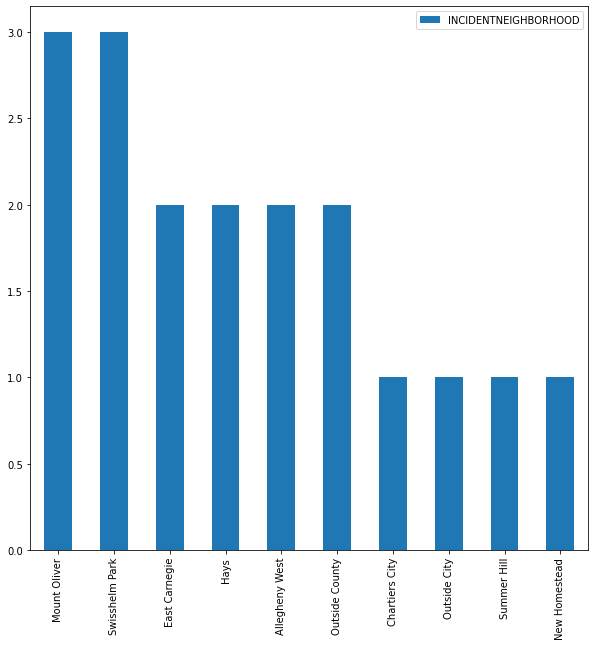

In [7]:
safe_neighborhoods.plot.bar(figsize = (10,10))

I plotted the 10 safest neighborhoods to show that there is not much difference between them as they are all relatively safe.

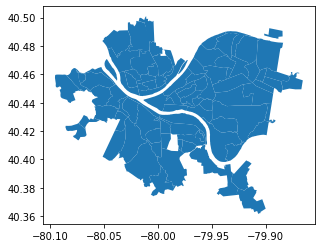

In [7]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() # plot the geopandas dataframe

I loaded the map of Pittsburgh.

In [8]:
value = df["INCIDENTNEIGHBORHOOD"].value_counts()
value = pd.DataFrame(value)
value

,INCIDENTNEIGHBORHOOD
Central Business District,170
South Side Flats,149
Carrick,96
East Liberty,90
Mount Washington,81
...,...
Outside County,2
Outside City,1
New Homestead,1
Chartiers City,1


I put all of the neighborhoods in a data frame.

In [9]:
incidents_map = neighborhoods.merge(value, how='left', left_on='hood', right_on=value.index)
# look at the head to confirm it merged correctly
incidents_map[['hood','INCIDENTNEIGHBORHOOD','geometry']].head()

,hood,INCIDENTNEIGHBORHOOD,geometry
0,Central Oakland,23.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,31.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,12.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,36.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,22.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


I start syncing the data up with the map of Pittsburgh.

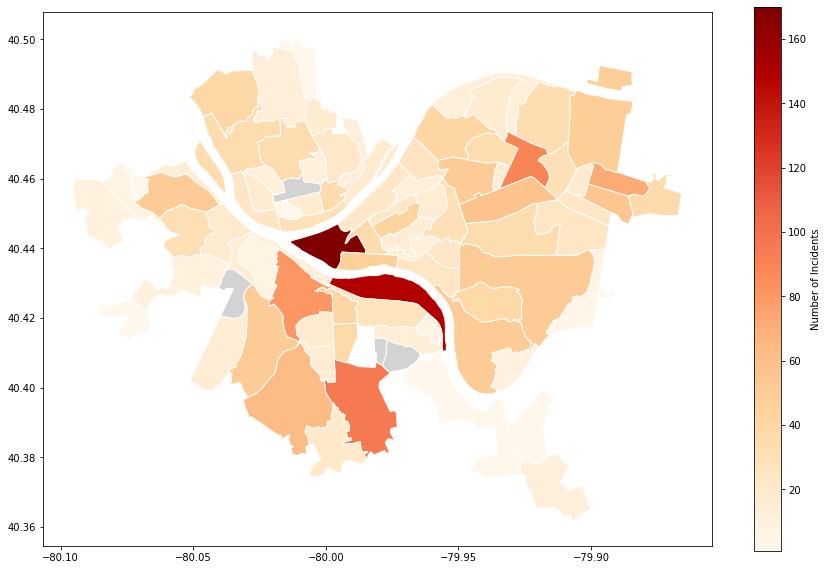

In [10]:
incidents_map.plot(column='INCIDENTNEIGHBORHOOD', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Incidents"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

I color code the map of Pittsburgh so the darker areas have more incidents. As you can see, there are many neighborhoods that have little to no incidents. Pairing this data with the data of my partners, I came to the conclusion that Mount Oliver is the safest since it is the best for their data sets and it is in the top 10 for mine.

In [31]:
ratingforpoliceincidentdata = (df["INCIDENTNEIGHBORHOOD"].value_counts())/ max(df["INCIDENTNEIGHBORHOOD"].value_counts())
ratingforpoliceincidentdata

Central Business District    1.000000
South Side Flats             0.876471
Carrick                      0.564706
East Liberty                 0.529412
Mount Washington             0.476471
                               ...   
Outside County               0.011765
Chartiers City               0.005882
Outside City                 0.005882
Summer Hill                  0.005882
New Homestead                0.005882
Name: INCIDENTNEIGHBORHOOD, Length: 90, dtype: float64

## Conclusion

### Overall ranking:

In [35]:
overallranking = ratingfor311 + ratingforarrestdata + ratingforpoliceincidentdata
overallranking

Allegheny Center       0.497073
Allegheny West         0.092387
Allentown              0.756639
Arlington              0.345317
Arlington Heights      0.077481
                         ...   
Upper Lawrenceville    0.343137
West End               0.225535
West Oakland           0.271027
Westwood               0.237738
Windgap                0.144141
Length: 100, dtype: float64

**Gabrielle:** The data-driven best neighborhood is Mount Oliver Borough, but that is different from my personal favorite neighborhood, which is South Side Slopes. South Side Slopes is where some of my relatives live and I grew up visiting them a lot so that neighborhood brings back a lot of childhood memories and nostalgia. This is ironic because according to my 311 data, South Side Slopes is considered the 4th LEAST SAFE neighborhood in Pittsburgh, whereas Mount Oliver Borough is the safest.

**Rachel:** I think that Mount Oliver Borough is the best neighborhood in Pittsburgh based on our metric of safety. They have very few arrests, 311 calls, and police-related incidents in general. Despite the fact that there are two neighborhoods that have fewer arrests than Mount Oliver Borough (Mt. Oliver Neighborhood and Troy Hill-Herrs Neighborhood), Mt. Oliver Borough is still the best. It has fewer 311 calls and police incident blotter data than either of the other two. All of this combined makes Mt. Oliver Borough the best neighborhood in Pittsburgh.

**Seth:** I think that the best neighborhood in Pittsburgh is Mount Oliver Borough. This is different than my favorite neighborhood Squirrel Hill North. Squirrel Hill North is my favorite because I like the little shops there. Squirrel Hill North, however, was one of the less safe neighborhoods by our metrics. Mount Oliver Borough was the safest overall 